In [2]:
import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


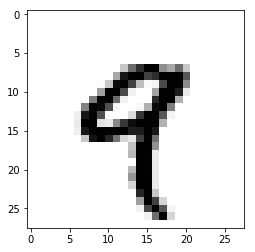

9


In [3]:
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print(train_labels[4])

In [4]:
import cv2
import matplotlib.pyplot as plt

image = plt.imread("5.jpg", cv2.IMREAD_GRAYSCALE)
dst = cv2.resize(image, dsize=(28, 28), interpolation=cv2.INTER_AREA)
plt.imshow(dst)
plt.show()

test_num1 = dst
test_num1 = test_num1[:,:,0]
test_num1 = (test_num1 > 100) * test_num1
test_num1 = test_num1.astype('float32') / 255.

plt.imshow(test_num1, cmap='Greys', interpolation='nearest');

test_num1 = test_num1.reshape((1, 28, 28, 1))

FileNotFoundError: ignored

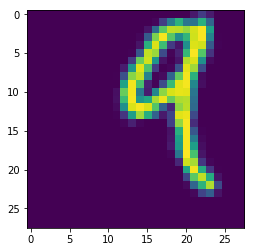

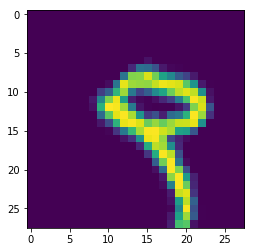

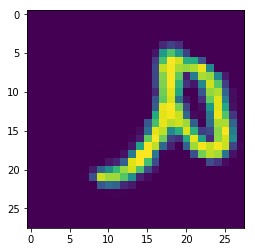

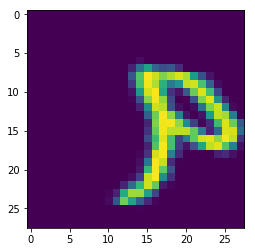

In [292]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

img_path = train_images[4]

x = image.img_to_array(img_path)
x = x.reshape((1,) + x.shape)


i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/-255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [365]:

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_34 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 64)              

In [0]:
# 데이터 제너레이터

from keras.preprocessing.image import ImageDataGenerator 
    
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#train_datagen.fit(train_images)

In [368]:
history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=128),
                    steps_per_epoch=512, epochs=10)

Epoch 1/10
512/512 [==============================] - 25s 48ms/step - loss: 1.1028 - acc: 0.6300
Epoch 2/10
512/512 [==============================] - 22s 43ms/step - loss: 0.4426 - acc: 0.8614
Epoch 3/10
512/512 [==============================] - 22s 44ms/step - loss: 0.2889 - acc: 0.9089
Epoch 4/10
512/512 [==============================] - 22s 44ms/step - loss: 0.2255 - acc: 0.9299
Epoch 5/10
512/512 [==============================] - 22s 43ms/step - loss: 0.1834 - acc: 0.9420
Epoch 6/10
512/512 [==============================] - 22s 43ms/step - loss: 0.1614 - acc: 0.9491
Epoch 7/10
512/512 [==============================] - 22s 44ms/step - loss: 0.1475 - acc: 0.9539
Epoch 8/10
512/512 [==============================] - 22s 43ms/step - loss: 0.1315 - acc: 0.9583
Epoch 9/10
512/512 [==============================] - 22s 44ms/step - loss: 0.1232 - acc: 0.9623
Epoch 10/10
512/512 [==============================] - 23s 44ms/step - loss: 0.1140 - acc: 0.9635


In [0]:
model.save('mnist_ver2.h5')

In [126]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

KeyError: ignored

In [1]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

NameError: ignored

In [360]:
print(model.predict(test_images[:1, :]))
print(test_labels[:1, :])

[[6.3052369e-08 1.9455700e-07 1.3360141e-06 4.4750732e-07 6.8596226e-09
  5.8594363e-10 1.9979522e-12 9.9999785e-01 2.9477558e-09 1.7252896e-07]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
